In [21]:
# lib
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# technical analysis
import ta

# Pyfolio
import pyfolio as pf

## data: 5 minutes data

In [22]:
df_ = pd.read_csv('C:ethusd5min.csv')
df = df_.set_index('timestamp')
df.index = pd.to_datetime(df.index)
df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2020-04-10 00:00:00,169.56,169.72,169.41,169.43,2906.41820,1586477099999,4.930542e+05,707,2260.79119,3.835677e+05,0
2020-04-10 00:05:00,169.44,169.59,168.92,169.22,3376.45186,1586477399999,5.711061e+05,1004,1951.63764,3.301054e+05,0
2020-04-10 00:10:00,169.23,169.42,168.70,168.78,3007.20677,1586477699999,5.081008e+05,752,929.71120,1.571687e+05,0
2020-04-10 00:15:00,168.84,169.12,168.80,169.00,1465.81110,1586477999999,2.476386e+05,472,637.17163,1.076405e+05,0
2020-04-10 00:20:00,168.99,169.40,168.96,169.36,1067.16710,1586478299999,1.806507e+05,418,343.42918,5.811992e+04,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-09 23:40:00,2066.80,2069.36,2065.89,2067.74,696.35201,1618011899999,1.439804e+06,1078,350.52749,7.246912e+05,0
2021-04-09 23:45:00,2067.75,2070.85,2067.62,2070.42,1039.88778,1618012199999,2.152313e+06,1344,554.96546,1.148618e+06,0
2021-04-09 23:50:00,2070.42,2070.95,2069.05,2069.52,773.88383,1618012499999,1.601904e+06,1142,428.07969,8.860856e+05,0


In [23]:
df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2020-04-10 00:00:00,169.56,169.72,169.41,169.43,2906.41820,1586477099999,4.930542e+05,707,2260.79119,3.835677e+05,0
2020-04-10 00:05:00,169.44,169.59,168.92,169.22,3376.45186,1586477399999,5.711061e+05,1004,1951.63764,3.301054e+05,0
2020-04-10 00:10:00,169.23,169.42,168.70,168.78,3007.20677,1586477699999,5.081008e+05,752,929.71120,1.571687e+05,0
2020-04-10 00:15:00,168.84,169.12,168.80,169.00,1465.81110,1586477999999,2.476386e+05,472,637.17163,1.076405e+05,0
2020-04-10 00:20:00,168.99,169.40,168.96,169.36,1067.16710,1586478299999,1.806507e+05,418,343.42918,5.811992e+04,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-09 23:40:00,2066.80,2069.36,2065.89,2067.74,696.35201,1618011899999,1.439804e+06,1078,350.52749,7.246912e+05,0
2021-04-09 23:45:00,2067.75,2070.85,2067.62,2070.42,1039.88778,1618012199999,2.152313e+06,1344,554.96546,1.148618e+06,0
2021-04-09 23:50:00,2070.42,2070.95,2069.05,2069.52,773.88383,1618012499999,1.601904e+06,1142,428.07969,8.860856e+05,0


In [24]:
close = pd.to_numeric(df.close)

## Simple Moving Average

- fast sma, slow sma crossover strategy

**What will be the best rolling window for fast and slow sma?**

i prefer the slow sma following 4 times longer window than the fast sma

In [25]:
fsma = ta.trend.sma_indicator(close,5)
ssma = ta.trend.sma_indicator(close,20)

In [26]:
diff = fsma - ssma
a = np.sign(diff).diff()*(.5)
crossover = a.loc[a!=0].dropna()

In [27]:
crossover

timestamp
2020-04-10 06:25:00    1.0
2020-04-10 06:50:00   -1.0
2020-04-10 08:35:00    1.0
2020-04-10 09:05:00   -1.0
2020-04-10 10:05:00    1.0
                      ... 
2021-04-09 20:10:00    1.0
2021-04-09 20:35:00   -1.0
2021-04-09 21:35:00    1.0
2021-04-09 22:20:00   -1.0
2021-04-09 23:50:00    1.0
Length: 7278, dtype: float64

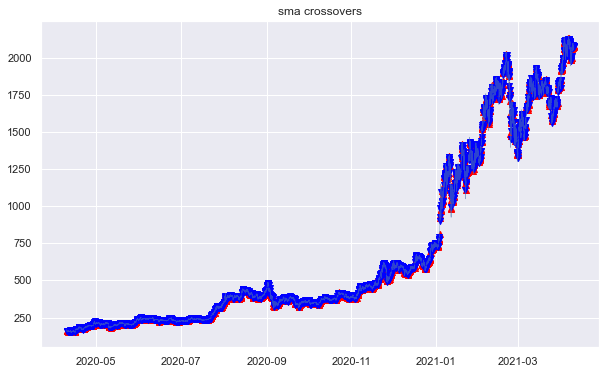

In [28]:
sc = crossover
title =  'sma crossovers'

long = close.loc[sc.loc[sc==1].index]
short = close.loc[sc.loc[sc==-1].index]

plt.figure(figsize=(10,6))
plt.plot(close, linewidth=0.5,alpha=0.6)
plt.scatter(long.index, long, c='red',marker='^', alpha=1)
plt.scatter(short.index, short, c='blue',marker='v', alpha=1)

plt.title(title)
plt.show()

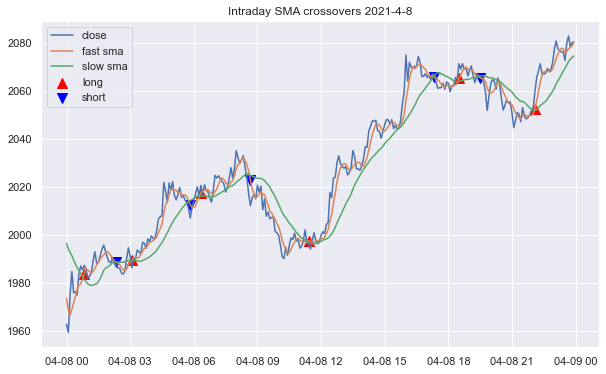

In [29]:
# Intraday
sc = crossover
title =  'Intraday SMA crossovers'

long = fsma.loc[sc.loc[sc==1].index]
short = fsma.loc[sc.loc[sc==-1].index]

day = ' 2021-4-8'
plt.figure(figsize=(10,6))
s = 100
plt.scatter(long.loc[day].index, long.loc[day],s=s, c='red',marker='^', alpha=1)
plt.scatter(short.loc[day].index, short.loc[day],s=s, c='blue',marker='v', alpha=1)
plt.plot(close.loc[day])
plt.plot(fsma.loc[day])
plt.plot(ssma.loc[day])
plt.title(title + day)
plt.legend(['close','fast sma','slow sma','long','short'])
plt.show()

## Backtest

Trading
- Only long  position
- Enter the long position when the long signal comes, exit the position when the short signal comes.
- Ignore when long or short signal comes in a row.

In [30]:
mult = (crossover+1)/2

In [31]:
rets = (close.loc[crossover.index].pct_change().shift(-1))*mult
rets = rets.loc[rets!=0].dropna()

In [32]:
rets

timestamp
2020-04-10 06:25:00   -0.007461
2020-04-10 08:35:00   -0.003534
2020-04-10 10:05:00   -0.001707
2020-04-10 12:25:00   -0.003474
2020-04-10 14:05:00   -0.007391
                         ...   
2021-04-09 13:40:00   -0.001745
2021-04-09 16:45:00    0.005136
2021-04-09 19:35:00   -0.001182
2021-04-09 20:10:00   -0.000687
2021-04-09 21:35:00   -0.003790
Length: 3649, dtype: float64

In [33]:
rets.describe()

count    3649.000000
mean        0.000329
std         0.010486
min        -0.062877
25%        -0.004140
50%        -0.001594
75%         0.001529
max         0.122052
dtype: float64

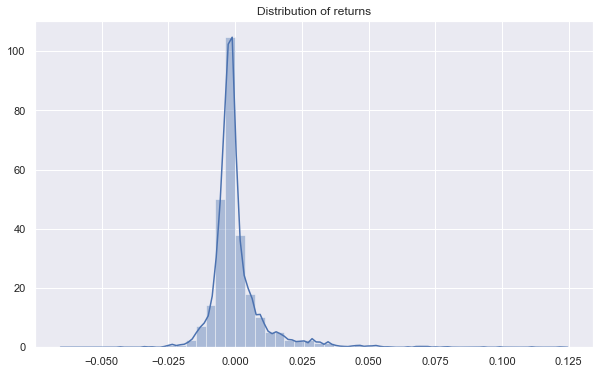

In [34]:
plt.figure(figsize=(10,6))
sns.distplot(rets)
plt.title('Distribution of returns')
plt.show()

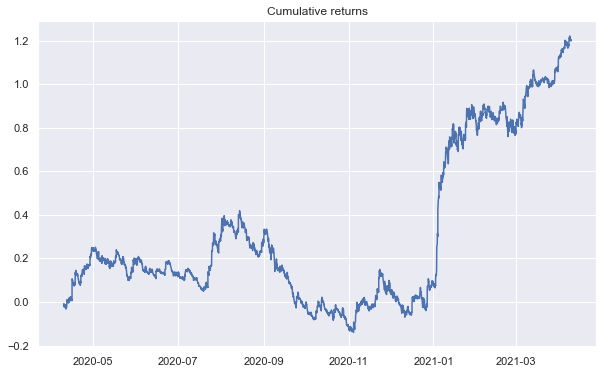

In [35]:
plt.figure(figsize=(10,6))
plt.plot(rets.cumsum())
plt.title('Cumulative returns')
plt.show()

In [36]:
SR = rets.mean()/rets.std()
print('Total Sharpe Ratio: ',SR)

Total Sharpe Ratio:  0.03133858191590024
